## Convolutional Neural Network Using Tensorflow

In [20]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #Checking to see if using GPU

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [22]:
classifier = Sequential()

In [23]:
classifier.add(Conv2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu')) #32 Feature maps with 3x3 

## Two Hidden Layers 

<img src="CNN.png" width="800" height="300" />


In [24]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, 3, 3, activation='relu')) #2nd Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [25]:
classifier.add(Flatten())

<img src="ReLU.png" width="400" height="200" />

In [26]:
classifier.add(Dense(units = 128, activation='relu')) ##Full connection as hidden layer
classifier.add(Dense(units = 1, activation='sigmoid'))

Output Layer

<img src="Sigmoid.png" width="400" height="200" />


In [27]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [28]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
        rescale=1./255, #Rescale Pixel Values
        shear_range=0.2, #Apply random transvections 
        zoom_range=0.2, #Random Zoon
        horizontal_flip=True) #Images flipped Horizontally

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'chest_xray/train/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'chest_xray/test/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [29]:
history = classifier.fit_generator(
        train_generator,
        steps_per_epoch=(5216/32),
        epochs=10,
        validation_data=validation_generator,
        validation_steps = (624/32))

Epoch 1/10
163/163 [==============================] - 55s 335ms/step - loss: 0.4016 - accuracy: 0.8232 - val_loss: 0.1438 - val_accuracy: 0.8590
Epoch 2/10
163/163 [==============================] - 50s 305ms/step - loss: 0.2294 - accuracy: 0.9047 - val_loss: 0.4232 - val_accuracy: 0.8542
Epoch 3/10
163/163 [==============================] - 48s 296ms/step - loss: 0.2024 - accuracy: 0.9151 - val_loss: 0.3100 - val_accuracy: 0.7869
Epoch 4/10
163/163 [==============================] - 47s 288ms/step - loss: 0.1929 - accuracy: 0.9224 - val_loss: 0.5475 - val_accuracy: 0.8766
Epoch 5/10
163/163 [==============================] - 48s 293ms/step - loss: 0.1810 - accuracy: 0.9294 - val_loss: 0.1720 - val_accuracy: 0.8990
Epoch 6/10
163/163 [==============================] - 51s 315ms/step - loss: 0.1796 - accuracy: 0.9306 - val_loss: 0.1003 - val_accuracy: 0.8702
Epoch 7/10
163/163 [==============================] - 47s 289ms/step - loss: 0.1704 - accuracy: 0.9277 - val_loss: 0.2358 - val_ac

In [30]:
#classifier.save('model.xrays')

### Testing Images Model has never seen before

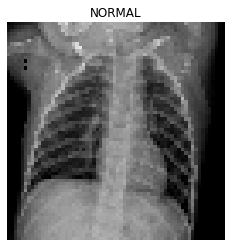

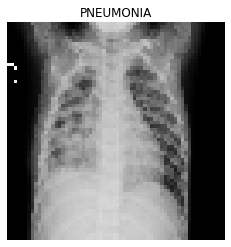

Our Model predicted NORMAL for the Top Image
Our Model predicted PNEUMONIA for the Bottom Image


In [31]:
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import re


def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        if re.search('NORMAL', img_path):
            plt.title('NORMAL')
        else:
            plt.title("PNEUMONIA")
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.xrays")

    # image path
    img_path = 'chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'    # Normal
    img_path2 = 'chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg' #Pneumonia

    # load a single image
    new_image = load_image(img_path)
    new_image2 = load_image(img_path2)

    # check prediction
    pred = model.predict_classes(new_image)
    if(pred[0][0] == 0):
        print('Our Model predicted NORMAL for the Top Image')
    else:
        print("Our Model predicted PNEUMONIA for the Top Image")
    pred2 = model.predict_classes(new_image2)
    if(pred2[0][0] == 0):
        print('Our Model predicted NORMAL for the Bottom Image')
    else:
        print("Our Model predicted PNEUMONIA for the Bottom Image")

### Errors and Validation Plots

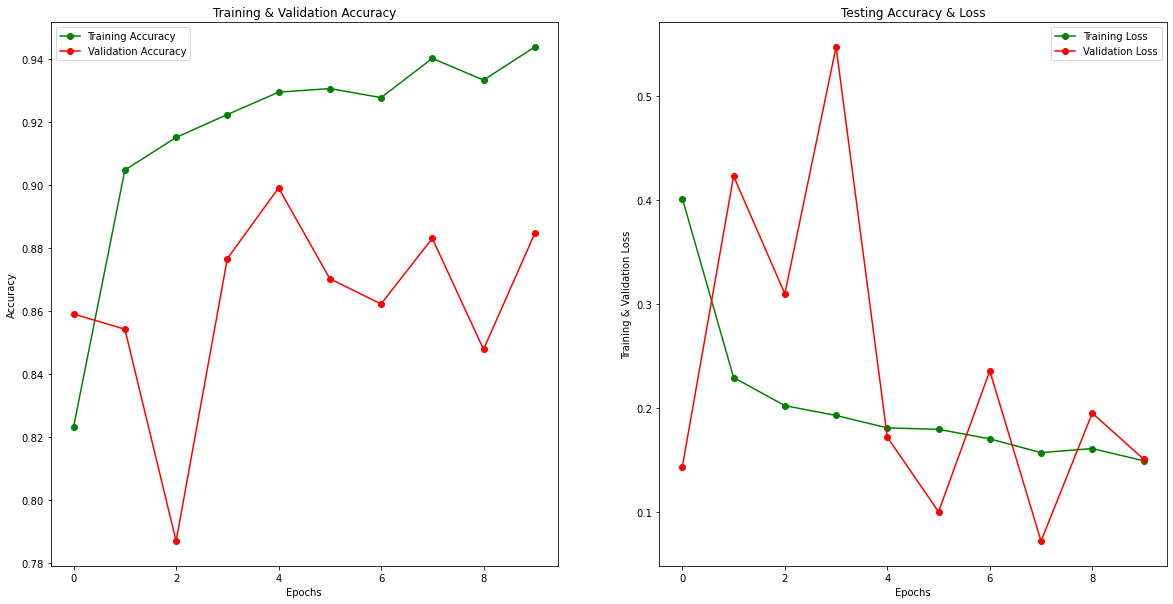

In [38]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()